In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [35]:
x_vals = np.array([1, 2, 3, 4, 5])
m_constant = tf.constant(3)
op = tf.multiply(x_vals, m_constant)

for i in op:
    print(i.numpy())

3
6
9
12
15


In [36]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

## Loss Function for Regression

In [37]:
class RegLoss:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        
    def l2(self):
        return tf.square(self.y_true - self.y_pred)
    
    def l1(self):
        return tf.abs(self.y_true - self.y_pred)
    
    def phuber(self, delta:float = 0.25):
        delta1 = tf.constant(delta)
        return tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((self.y_true - self.y_pred)/delta1)) - 1.)
    

In [42]:
x_vals_r = tf.linspace(-1., 1., 500)
target_r = tf.constant(0.)

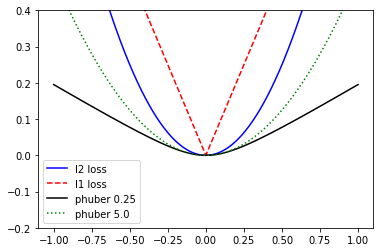

In [43]:
r = RegLoss(target_r, x_vals_r)

funcs = [(r.l2(), 'b-', 'l2 loss'),
        (r.l1(), 'r--', 'l1 loss'),
        (r.phuber(0.25), 'k-', 'phuber 0.25'),
        (r.phuber(5.0), 'g:', 'phuber 5.0')]

for func, line_type, func_name in funcs:
    plt.plot(x_vals_r, func, line_type, label=func_name)
    
plt.ylim(-0.2, 0.4)
plt.legend()
plt.show()

# Loss Function for Classification

In [44]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.fill([500], 1.)
target

<tf.Tensor: shape=(500,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [45]:
class ClasLoss:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        
    def hinge(self):
        return tf.maximum(0., 1. - tf.multiply(self.y_true, self.y_pred))
    
    def cross_entropy(self):
        return (-tf.multiply(self.y_true, tf.math.log(self.y_pred) - tf.multiply((1 - self.y_true), (tf.math.log(1 - self.y_pred)))))
    
    def cross_entropy_sigmoid(self):
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=self.y_true, logits=self.y_pred)
    
    def cross_entropy_weighted(self):
        weight = tf.constant(0.5)
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=self.y_true, logits=self.y_pred)
        

In [46]:
x_vals_c = tf.linspace(-3., 5., 500)
target_c = tf.fill([500], 1.)

In [47]:
c = ClasLoss(target_c, x_vals_c)

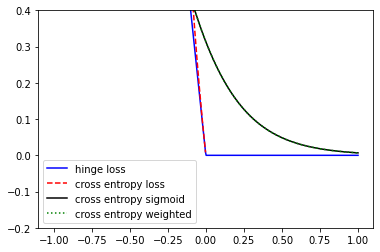

In [48]:
funcs = [(c.hinge(), 'b-', 'hinge loss'),
        (c.cross_entropy(), 'r--', 'cross entropy loss'),
        (c.cross_entropy_sigmoid(), 'k-', 'cross entropy sigmoid'),
        (c.cross_entropy_weighted(), 'g:', 'cross entropy weighted')]

for func, line_type, func_name in funcs:
    plt.plot(x_vals_r, func, line_type, label=func_name)
    
plt.ylim(-0.2, 0.4)
plt.legend()
plt.show()

# Regression Backpropagation

In [49]:
import numpy as np
import tensorflow as tf

In [66]:
np.random.seed(0)
x_vals = np.random.normal(1, 0.1, 100).astype(np.float32)
y_vals = (x_vals * np.random.normal(1, 0.5, 100)).astype(np.float32)


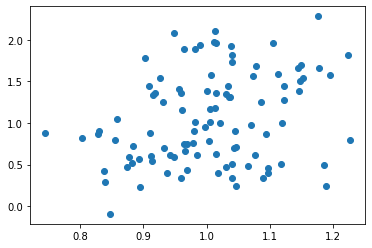

In [67]:
plt.scatter(x_vals, y_vals)
plt.show()

In [69]:
opt = tf.optimizers.SGD(learning_rate=0.02)
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape=[1]))
bias = tf.Variable(tf.random.normal(shape=[1]))
history = list()

def output(X:float, weights:float, bias:float) -> float:
    return tf.add(tf.multiply(X, weights), bias)

def loss(y_true:np.array, y_pred:np.array) -> float:
    return tf.reduce_mean(tf.square(y_true - y_pred))


for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = x_vals[rand_index]
    rand_y = y_vals[rand_index]
    
    with tf.GradientTape() as tape:
        predictions = output(rand_x, weights, bias)
        loss_ = loss(rand_y, predictions)
    
    history.append(loss_.numpy())
    gradients = tape.gradient(loss_, [weights, bias])
    opt.apply_gradients(zip(gradients, [weights, bias]))
    
    if (i+1) % 25 == 0:
        print(f"Step: {i+1}, Weights: {weights.numpy()}, Bias: {bias.numpy()}")
        print(f"loss: {loss_.numpy()}")

Step: 25, Weights: [-0.4171495], Bias: [1.0622234]
loss: 1.191279411315918
Step: 50, Weights: [-0.23220971], Bias: [1.2375932]
loss: 0.1513185352087021
Step: 75, Weights: [-0.20322767], Bias: [1.2384508]
loss: 0.08278058469295502
Step: 100, Weights: [-0.17878215], Bias: [1.2352996]
loss: 0.734293520450592


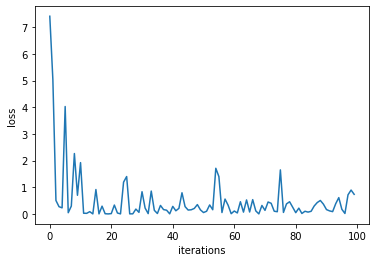

In [70]:
plt.plot(history)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

# Classification Backpropagation

In [54]:
np.random.seed(0)
x_vals = np.concatenate(
                        (np.random.normal(-3, 1, 50),
                        (np.random.normal(3, 1, 50)))
                        ).astype(np.float32)
y_vals = np.concatenate(
                        (np.repeat(0., 50),
                        np.repeat(1., 50))
                        ).astype(np.float32)

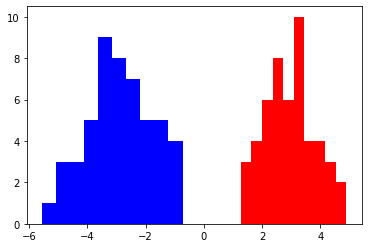

In [55]:
plt.hist(x_vals[y_vals==1], color="red")
plt.hist(x_vals[y_vals==0], color="blue")
plt.show()

In [56]:
def loss_func(y_true, y_pred):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred))


def output(X:float, weights:float, bias:float) -> float:
    return tf.add(tf.multiply(X, weights), bias)

In [72]:
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape=[1])) 
biases = tf.Variable(tf.random.normal(shape=[1])) 
history = list()
opt = tf.optimizers.SGD(learning_rate=0.02)

for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    
    with tf.GradientTape() as tape:
        predictions = output(rand_x, weights, bias)
        loss_ = loss_func(rand_y, predictions)
    history.append(loss_.numpy())
    gradients = tape.gradient(loss_, [weights, bias])
    opt.apply_gradients(zip(gradients, [weights, bias]))
    
    if (i+1) % 25 == 0:
        print(f"Step: {i+1}, Weights: {weights.numpy()}, Bias: {bias.numpy()}")
        print(f"loss: {loss_.numpy()}")

Step: 25, Weights: [-0.955734], Bias: [1.3716671]
loss: 0.41680026054382324
Step: 50, Weights: [-0.7516331], Bias: [1.5730394]
loss: 0.09565877914428711
Step: 75, Weights: [-0.5578982], Bias: [1.7509222]
loss: -0.012620806694030762
Step: 100, Weights: [-0.37869754], Bias: [1.917452]
loss: 1.3350780010223389


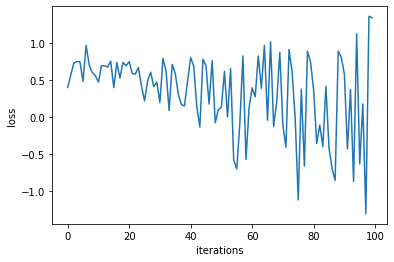

In [74]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

# Iris Classification

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [76]:
batch_size = 20
iris = tfds.load('iris', split='train[:90%]', as_supervised=True)
iris_test = tfds.load('iris', split='train[90%:]', as_supervised=True)

def iris2d(features, label):
    return features[2:], tf.cast((label == 0), dtype=tf.float32)

train_generator = (iris
 .map(iris2d)
 .shuffle(buffer_size=100)
 .batch(batch_size)
 )
test_generator = iris_test.map(iris2d).batch(1)

In [77]:
def cross_entropy_sigmoid(y_true, y_pred):
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)

In [78]:
def linear_model(X, A, b):
    my_output = tf.add(tf.matmul(X, A), b) 
    return tf.squeeze(my_output)

In [79]:
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred))

In [80]:
opt = tf.optimizers.SGD(learning_rate=0.02)

In [85]:
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape=[2, 1]))
bias = tf.Variable(tf.random.normal(shape=[1]))
history = list()

for i in range(300):
    iteration_loss = list()
    for features, label in train_generator:
        with tf.GradientTape() as tape:
            predictions = linear_model(features, weights, bias)
            loss_ = loss(label, predictions)
        iteration_loss.append(loss_.numpy())
        gradients = tape.gradient(loss_, [weights, bias])
        opt.apply_gradients(zip(gradients, [weights, bias]))
    history.append(np.mean(iteration_loss))
    if (i+1) % 25 == 0:
        print(f"Steps: {i+1}")
        print(f"Loss: {loss_.numpy()}")

Steps: 25
Loss: 0.3432738482952118
Steps: 50
Loss: 0.34702175855636597
Steps: 75
Loss: 0.18604129552841187
Steps: 100
Loss: 0.2531917989253998
Steps: 125
Loss: 0.13726215064525604
Steps: 150
Loss: 0.20994043350219727
Steps: 175
Loss: 0.1982346475124359
Steps: 200
Loss: 0.13270306587219238
Steps: 225
Loss: 0.11087305098772049
Steps: 250
Loss: 0.1509561836719513
Steps: 275
Loss: 0.12614016234874725
Steps: 300
Loss: 0.10142426192760468


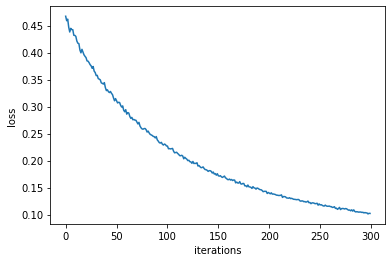

In [86]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [87]:
# test

predictions = list()
labels = list()

for features, label in test_generator:
    predictions.append(linear_model(features, weights, bias))
    labels.append(label.numpy()[0])
    
test_loss = loss(np.array(labels), np.array(predictions)).numpy()
test_loss

0.1022849